서포트 벡터 머신 분류

목적: 유방암 결과를 분류하는 서포트 벡터 머신 모델을 만들고 predict method를 이용하여 목표변수 범주를 예측하라. 그리고 모델의 정확도와 confusion matrix를 구하라.

In [97]:
#사용할 패키지를 적재한다
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [98]:
#사용할 유방암 데이터를 읽어온다
df_raw = pd.read_csv('/home/piai/바탕화면/2. Big Data 분석/유방암.csv', encoding= 'euc-kr')

In [99]:
#결측치 데이터가 존재하는지 확인한다
df_raw.isnull().sum()

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

결측치가 존재하지 않기 때문에 결측치를 제거할 필요가 없다

In [100]:
#목표형 변수가 음성과 양성으로 존재하기 때문에 이를 0과 1로 연속형 변수로 분리한다
df_raw = df_raw.replace({'음성':0,'양성':1})
df_raw_dummy=pd.get_dummies(df_raw)
df_raw_dummy.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,0,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,1,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,1,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [101]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

In [102]:
#데이터를 train, test셋으로 분리하고 사이즈를 확인한다
df_raw_x=df_raw_dummy.drop('diagnosis',axis=1,inplace=False)
df_raw_y=df_raw_dummy['diagnosis']
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.4,random_state=42)
print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data Y size : {}'.format(df_test_y.shape))

train data X size : (192, 30)
train data Y size : (192,)
test data X size : (128, 30)
test data Y size : (128,)


In [103]:
#아무런 하이퍼 파라미터를 지정하지 않은 svm 모델의 정확도를 확인해본다
svm_uncustomized=SVC()
svm_uncustomized.fit(df_train_x,df_train_y)
print('Accuracy on training set : {:.3f}'.format(svm_uncustomized.score(df_train_x,df_train_y)))
print('Accuracy on test set : {:.3f}'.format(svm_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set : 0.896
Accuracy on test set : 0.891


정확도는 둘다 90%가 약간 모자라면서 낮은 정확도이지만 트레인 셋의 정확도와 테스트 셋의 정확도의 차이가 적기 때문에 과적합되지 않은 좋은 모델이라고 볼 수 있다.

In [113]:
#svm모델은 데이터 단위의 영향이 크기 때문에 사전 작업을 해야할 필요가 있다
v_feature_name = df_train_x.columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled,columns=v_feature_name)
df_scaled.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,-0.149283,-1.156442,-0.153789,-0.224951,0.490637,0.139396,-0.094470,-0.301949,0.525611,0.511081
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,-1.341759,-2.517236,-1.380396,-1.124201,0.254373,-1.046076,-1.159323,-1.480312,-1.387506,-0.507149
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,0.534893,-0.143296,0.445031,0.432104,-0.613360,-0.367031,0.004076,0.172850,0.223844,-0.886803
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-0.263312,-1.490846,-0.312546,-0.354487,-1.339335,-0.169261,-0.176669,-0.458230,-0.524077,-0.220788
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,-0.951354,-1.934512,-0.997708,-0.869505,-1.783511,-1.108951,-1.094404,-1.366747,-1.071301,-0.898278


In [114]:
#스케일링 작업이 끝났기 때문에 이를 다시 train, test 셋으로 분리할 필요가 있다
df_scaled_train_x,df_scaled_test_x = train_test_split(df_scaled,test_size=0.4,random_state=42)
print('train data X size : {}'.format(df_scaled_train_x.shape))
print('test data X size : {}'.format(df_scaled_test_x.shape))

train data X size : (192, 30)
test data X size : (128, 30)


In [116]:
#같은 svm모델이지만 스케일링 후 train 데이터를 적합하면 더 높은 성능을 보인다
svm_scaled=SVC()
svm_scaled.fit(df_scaled_train_x,df_train_y)
print('Accuracy on training set : {:.3f}'.format(svm_scaled.score(df_scaled_train_x,df_train_y)))
print('Accuracy on test set : {:.3f}'.format(svm_scaled.score(df_scaled_test_x,df_test_y)))

Accuracy on training set : 0.990
Accuracy on test set : 0.969


scaling을 하자 정확도가 더 올라갔다. svm은 데이터 단위의 영향을 크게 받기 때문에 scaling을 하기 전에 특정 변수가 큰 영향을 줬을 것이라고 예상된다. 그렇기에 이런 차이가 발생한 것으로 보인다. 해당 요인에 대한 분류 조건에 대한 정보가 미흡한 것 또한 svm의 단점이라고 볼 수 있다.

In [117]:
#c의 변화에 따른 정확도 변화
#c: 이상치가 허용된 경우 완벽하게 분리할 수 없어 일정 수준의 오류를 허용하는 정도
train_accuracy = []
test_accuracy = []
para_c = [c * 0.1 for c in range(1,51)]

for v_C in para_c:
    svm = SVC(C = v_C)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))

df_accuracy_c = pd.DataFrame()
df_accuracy_c['C'] = para_c
df_accuracy_c['TrainAccuracy'] = train_accuracy
df_accuracy_c['TestAccuracy'] = test_accuracy
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.1,0.932,0.945
1,0.2,0.953,0.945
2,0.3,0.958,0.953
3,0.4,0.979,0.953
4,0.5,0.984,0.953
5,0.6,0.990,0.961
6,0.7,0.990,0.961
7,0.8,0.990,0.969
8,0.9,0.990,0.969
9,1.0,0.990,0.969


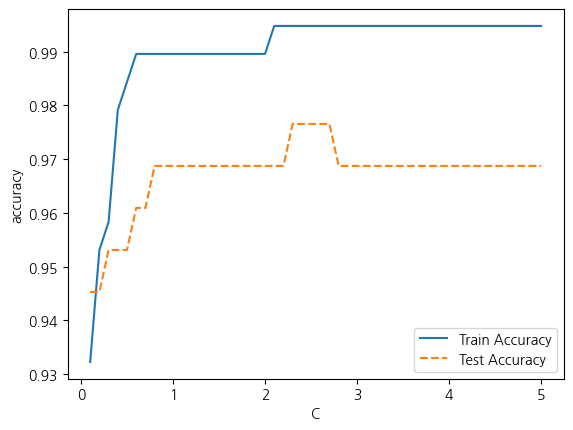

In [118]:
plt.plot(para_c, train_accuracy, linestyle='-', label = 'Train Accuracy')
plt.plot(para_c, test_accuracy, linestyle='--', label = 'Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('C')
plt.legend()

c값이 늘어날수록 train accuracy가 증가하지만 test accuracy는 다른 방향으로 증가하고 있다. 이는 과적합의 위험성을 의미하기 때문에 train accuracy와 test accuracy의 차이가 가장 적은 2.3으로 선택한다.

In [121]:
#gamma는 kernel의 최적화를 돕는 파라미터로 하나의 데이터가 동일한 클래스로 분류되게 하려는 영향력의 거리를 의미한다
#gamma가 커질수록 모델의 복잡도가 증가해서 과적합될 수 있다
#gamma값의 변화에 따른 모델 성능을 비교한다
train_accuracy = []
test_accuracy = []
para_gamma = [0.05 * gamma for gamma in range(1,15)]

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma,C = 2.3)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))

df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma['gamma'] = para_gamma
df_accuracy_gamma['TrainAccuracy'] = train_accuracy
df_accuracy_gamma['TestAccuracy'] = test_accuracy
df_accuracy_gamma.round(3)

,gamma,TrainAccuracy,TestAccuracy
0,0.05,0.995,0.969
1,0.10,1.000,0.961
2,0.15,1.000,0.945
3,0.20,1.000,0.914
4,0.25,1.000,0.898
5,0.30,1.000,0.875
6,0.35,1.000,0.859
7,0.40,1.000,0.844
8,0.45,1.000,0.820
9,0.50,1.000,0.812


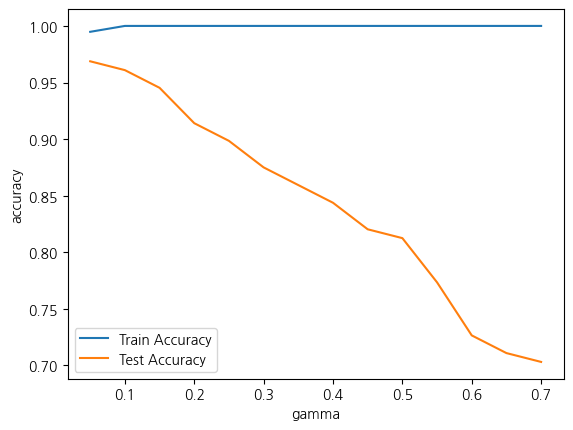

In [122]:
plt.plot(para_gamma, train_accuracy, linestyle='-', label = 'Train Accuracy')
plt.plot(para_gamma, test_accuracy, linestyle='-', label = 'Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('gamma')
plt.legend()

gamma값이 커질 수록 과적합의 위험이 커진다 또한 gamma 값이 커질수록 test accuracy가 작아지기 때문에 train_accuracy가 1에 도달하면서 가장 작은 gamma값인 0.1로 선택한다

In [123]:
svc_final=SVC(gamma=0.1,C=1.3)
svc_final.fit(df_scaled_train_x,df_train_y)
y_pred=svc_final.predict(df_scaled_test_x)

print('Accuracy on training set : {:.3f}'.format(svc_final.score(df_scaled_train_x,df_train_y)))
print('Accuracy on test set : {:.3f}'.format(svc_final.score(df_scaled_test_x,df_test_y)))
print('Confusion matrix : \n{}'.format(confusion_matrix(df_test_y,y_pred)))
print(classification_report(df_test_y,y_pred,digits=3))

Accuracy on training set : 1.000
Accuracy on test set : 0.945
Confusion matrix : 
[[77  5]
 [ 2 44]]
              precision    recall  f1-score   support

           0      0.975     0.939     0.957        82
           1      0.898     0.957     0.926        46

    accuracy                          0.945       128
   macro avg      0.936     0.948     0.941       128
weighted avg      0.947     0.945     0.946       128



정밀도와 정확성을 모두 고려한 f1-score가 높은 수치로 나온다 또한 주요 관심사인 유방암이 양성일 가능성 1을 1로 판단한 recall이 높게 나왔다. 그렇기 때문에 좋은 모델이라고 볼 수 있다. 다만 svm은 설명력이 떨어지기 때문에 이에 따른 해결방안을 제시하기 어렵다